In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math
import numpy as np

In [43]:
# Define the read_csv function
def read_csv(filename, distance):
    df_read = pd.read_csv(filename)  # Read CSV file
    df_value = df_read['Signal strength (RSSI)'].apply(lambda x: int(x.strip('dBm')))  # Convert dBm values to integers
    
    df = pd.DataFrame(df_value)  # Create a DataFrame
    df["Distance"] = distance  # Add a 'Distance' column
    return df

# Read the first CSV file
all_df = read_csv("Indoor1.csv", 1)

# Loop through remaining files and concatenate DataFrames
for i in range(2, 11):
    df = read_csv(filename=f"Indoor{i}.csv", distance=i)
    all_df = pd.concat([all_df, df], ignore_index=True)  



In [45]:
all_df.groupby("Distance").count()

,Signal strength (RSSI)
Distance,
1,322
2,263
3,290
4,246
5,391
6,304
7,343
8,230
9,314


<AxesSubplot:xlabel='Distance', ylabel='Signal strength (RSSI)'>

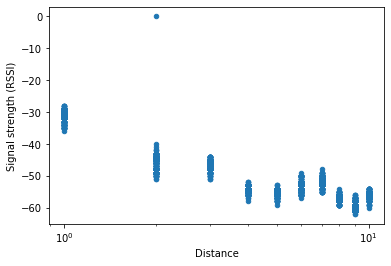

In [46]:
all_df.plot(kind="scatter", x="Distance", y = "Signal strength (RSSI)", logx = True)

In [47]:
all_df["log_Distance"] = all_df["Distance"].apply(math.log10)
all_df
all_df.groupby("log_Distance").count()
# all_df

,Signal strength (RSSI),Distance
log_Distance,,
0.000000,322,322
0.301030,263,263
0.477121,290,290
0.602060,246,246
0.698970,391,391
0.778151,304,304
0.845098,343,343
0.903090,230,230
0.954243,314,314


y=-24.469503947332427x + -34.956833882386704


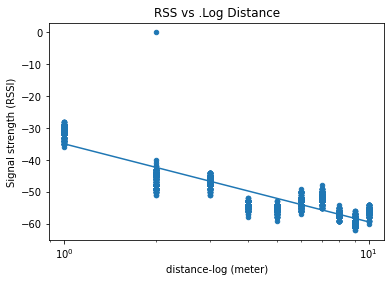

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
m, b = np.polyfit(all_df["log_Distance"], all_df["Signal strength (RSSI)"], 1)
fig, ax1 = plt.subplots(1)
ax1.plot(all_df["Distance"], m*all_df["log_Distance"] + b)
all_df.plot(kind="scatter", x="Distance", y = "Signal strength (RSSI)", logx = True, ax=ax1)

# ax1.text(0.05, 0.05, f"y = {m}x + {b}", transform=ax1.transAxes, fontsize=12, verticalalignment='top')
ax1.set_xlabel("distance-log (meter)")
ax1.set_title("RSS vs .Log Distance")

print(f"y={m}x + {b}")
predicted_rssi = m * all_df["log_Distance"] + b

# Calculate R-squared
r_squared = r2_score(all_df["Signal strength (RSSI)"], predicted_rssi)

# print(f"R-squared = {r_squared:.2f}")

In [100]:
avg_all_df = all_df.groupby("Distance").mean()
avg_all_df = avg_all_df.drop(4)
avg_all_df = avg_all_df.drop(5)
avg_all_df

,Signal strength (RSSI),log_Distance
Distance,,
1,-31.220497,0.000000
2,-45.809886,0.301030
3,-46.341379,0.477121
6,-53.118421,0.778151
7,-51.965015,0.845098
8,-57.191304,0.903090
9,-59.076433,0.954243
10,-56.125506,1.000000


y=-24.03022234696737x + -34.309989645044695
R-squared-value = 0.92


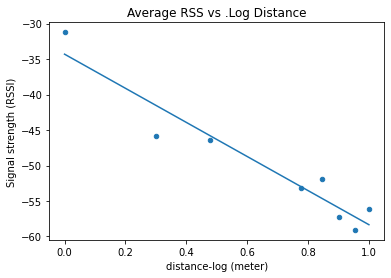

In [101]:
x = avg_all_df["log_Distance"]
y = avg_all_df["Signal strength (RSSI)"]
m, b = np.polyfit(x,y ,1)

fig, ax1 = plt.subplots(1)
ax1.plot(x, m*x + b)
avg_all_df.plot(kind="scatter", x="log_Distance", y = "Signal strength (RSSI)", ax=ax1)
ax1.set_xlabel("distance-log (meter)")
ax1.set_title("Average RSS vs .Log Distance")
print(f"y={m}x + {b}")

predicted_rssi = m * avg_all_df["log_Distance"] + b

# Calculate R-squared
r_squared = r2_score(avg_all_df["Signal strength (RSSI)"], predicted_rssi)

print(f"R-squared-value = {r_squared:.2f}")

## Outdoor experiment


In [70]:
# Read the first CSV file
all_df2 = read_csv("Outdoor1.csv", 1)

# Loop through remaining files and concatenate DataFrames
for i in range(2, 11):
    df2 = read_csv(filename=f"Outdoor{i}.csv", distance=i)
    all_df2 = pd.concat([all_df2, df2], ignore_index=True) 

In [71]:
all_df2.groupby("Distance").count()

,Signal strength (RSSI)
Distance,
1,281
2,257
3,302
4,214
5,270
6,219
7,395
8,218
9,300


<AxesSubplot:xlabel='Distance', ylabel='Signal strength (RSSI)'>

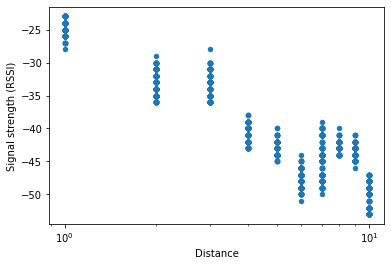

In [72]:
all_df2.plot(kind="scatter", x="Distance", y = "Signal strength (RSSI)", logx = True)

In [74]:
all_df2["log_Distance"] = all_df2["Distance"].apply(math.log10)
all_df2
all_df2.groupby("log_Distance").count()

,Signal strength (RSSI),Distance
log_Distance,,
0.000000,281,281
0.301030,257,257
0.477121,302,302
0.602060,214,214
0.698970,270,270
0.778151,219,219
0.845098,395,395
0.903090,218,218
0.954243,300,300


y=-22.844563024967783x + -25.399002670875834


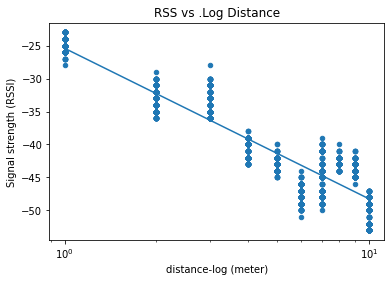

In [75]:
m, b = np.polyfit(all_df2["log_Distance"], all_df2["Signal strength (RSSI)"], 1)
fig, ax1 = plt.subplots(1)
ax1.plot(all_df2["Distance"], m*all_df2["log_Distance"] + b)
all_df2.plot(kind="scatter", x="Distance", y = "Signal strength (RSSI)", logx = True, ax=ax1)
ax1.set_xlabel("distance-log (meter)")
ax1.set_title("RSS vs .Log Distance")

print(f"y={m}x + {b}")

In [95]:
avg_all_df2 = all_df2.groupby("Distance").mean()
avg_all_df2 = avg_all_df2.drop(6)
avg_all_df2

,Signal strength (RSSI),log_Distance
Distance,,
1,-24.857651,0.000000
2,-33.342412,0.301030
3,-33.605960,0.477121
4,-40.640187,0.602060
5,-43.144444,0.698970
7,-44.865823,0.845098
8,-42.862385,0.903090
9,-44.016667,0.954243
10,-49.873786,1.000000


y=-22.026101079694126x + -25.54032788641628
R-squared-value = 0.93


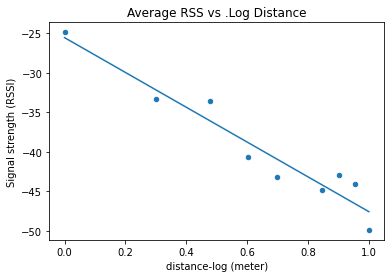

In [96]:
x = avg_all_df2["log_Distance"]
y = avg_all_df2["Signal strength (RSSI)"]
m, b = np.polyfit(x,y ,1)

fig, ax1 = plt.subplots(1)
ax1.plot(x, m*x + b)
avg_all_df2.plot(kind="scatter", x="log_Distance", y = "Signal strength (RSSI)", ax=ax1)
ax1.set_xlabel("distance-log (meter)")
ax1.set_title("Average RSS vs .Log Distance")
print(f"y={m}x + {b}")

predicted_rssi = m * avg_all_df2["log_Distance"] + b

# Calculate R-squared
r_squared = r2_score(avg_all_df2["Signal strength (RSSI)"], predicted_rssi)

print(f"R-squared-value = {r_squared:.2f}")